In [4]:
import os
import numpy as np
from numpy import reshape
import torch

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import pandas as pd
from pathlib import Path
home = str(Path.home())
base_path = os.path.join(home, 'workspace/multiLID/data/extract/run_1/')

In [21]:
NR_SAMPLES=2000
# attacks = ['fgsm', 'bim', 'pgd', 'aa', 'df', 'cw']
attacks = ['fgsm', 'bim', 'pgd', 'aa']
# labels  = ['FGSM', 'BIM', 'PGD', 'AA', 'DF', 'CW']
labels  = ['FGSM', 'BIM', 'PGD', 'AA', ]
#cdict  = {0: 'black', 1: 'pink', 2: 'blue', 3: 'red', 4: 'green', 5: 'cyan', 6: 'orange', 7: 'purple'}
cdict  = {0: 'blue', 1: 'red', 2: 'green', 3: 'cyan'}
# cdict  = {0: 'blue', 1: 'red', 2: 'green', 3: 'cyan', 4: 'orange', 5: 'purple'}

In [35]:
characteristics_clean = {}
characteristics_adv = {}
for att in attacks:
    print("att:", att)
    eps = ""
    if att in ['fgsm', 'bim', 'pgd', 'aa']:
        eps = "_8255"
    
    clean     = torch.load(os.path.join(base_path, 'cifar10/wrn28-10/multilid/{}/k20/multilid_normalos{}.pt'.format(att, eps)) ).numpy()[:NR_SAMPLES]
    chars_adv = torch.load(os.path.join(base_path, 'cifar10/wrn28-10/multilid/{}/k20/multilid_adverlos{}.pt'.format(att, eps)) ).numpy()[:NR_SAMPLES]
    characteristics_clean[att] = clean
    characteristics_adv[att]   = chars_adv

att: fgsm
att: bim
att: pgd
att: aa


In [43]:
characteristics_adv['fgsm'].shape

(2000, 20, 13)

ValueError: Must pass 2-d input. shape=(2000, 20, 13)

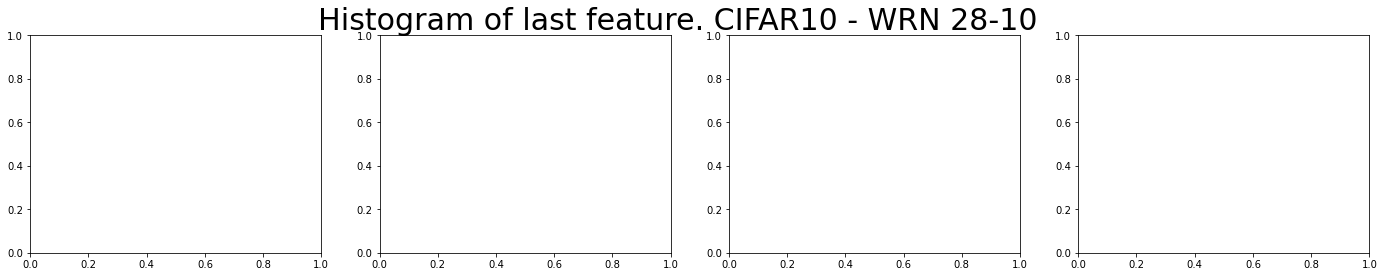

In [30]:
Layer_nr = 12

fig, axs = plt.subplots(  1 , len(attacks), figsize=(24, 4) )
BINS = 20

fig.suptitle( "Histogram of last feature. CIFAR10 - WRN 28-10", fontsize=30 )

for i, att in enumerate(attacks):
    df = pd.DataFrame.from_dict(characteristics_clean[att])
    df_adv = pd.DataFrame.from_dict(characteristics_adv[att])
    df[int(Layer_nr)].plot.hist(ax=axs[i], bins=BINS, color='black', alpha = 0.9)
    df_adv[int(Layer_nr)].plot.hist( ax=axs[i], bins=BINS, color=cdict[i], alpha = 0.5)
    if i  == 0:
        axs[i].set_ylabel("frequency", fontsize=25 )
    if i  > 0:
        axs[i].set_ylabel("")

    axs[i].set_title(labels[i], fontsize=25)
    axs[i].set_xlabel("bins", fontsize=25)
        
fig.tight_layout(rect=[0, 0, 0.99, 0.99])

In [ ]:
fig.savefig( 'plots/' + 'bins/' + 'cifar10_hist_vert_1row_k20_new.png', bbox_inches='tight', dpi=600)